# Юридическая классификация текстов цитат
Этот набор данных содержит австралийские судебные дела из Федерального суда Австралии (FCA). Дела были загружены из AustLII. Включены все дела за 2006, 2007, 2008 и 2009 годы. Для каждого документа собраны крылатые фразы, предложения цитат, крылатые фразы цитат и классы цитат. Классы цитат указаны в документе и указывают тип обработки, предоставленной случаям, цитируемым в настоящем деле.

In [17]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
import plotly.graph_objs as go
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:
# Загрузка данных
text = pd.read_csv('/content/legal_text_classification.csv')
text

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...
...,...,...,...,...
24980,Case25203,cited,Reches Pty Ltd v Tadiran Pty Ltd (1998) 85 FCR...,That is not confined to persons who control th...
24981,Case25204,cited,Sir Lindsay Parkinson &amp; Co Ltd v Triplan L...,Once the threshold prescribed by s 1335 is sat...
24982,Case25205,cited,Spiel v Commodity Brokers Australia Pty Ltd (I...,Once the threshold prescribed by s 1335 is sat...
24983,Case25206,distinguished,"Tullock Ltd v Walker (Unreported, Supreme Cour...",Given the extent to which Deumer stands to gai...


In [19]:
text['case_outcome'].unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed', 'approved'],
      dtype=object)

'цитируется', 'применяется', 'следует', 'ссылается', 'связано', 'рассмотрено', 'обсуждается', 'выделено', 'подтверждено', 'одобрено'

In [20]:
# Нормализация и лемматизация
lemmatizer = WordNetLemmatizer()

def normal_text(text):
  if isinstance(text, str):  # Проверка, является ли текст строкой
      text = re.sub(r'\W+', ' ', text)  # Удаление специальных символов
      text = text.lower()  # Приведение к нижнему регистру
      words = nltk.word_tokenize(text)  # Токенизация
      lemmatized_words = [lemmatizer.lemmatize(word) for word in words]  # Лемматизация
      return ' '.join(lemmatized_words)
  else:
      return ''  # Возвращаем пустую строку для нестроковых значений

text['normal_text'] = text['case_text'].apply(normal_text)

In [21]:
text['normal_text']

,normal_text
0,ordinarily that discretion will be exercised s...
1,the general principle governing the exercise o...
2,ordinarily that discretion will be exercised s...
3,the general principle governing the exercise o...
4,the preceding general principle inform the exe...
...,...
24980,that is not confined to person who control the...
24981,once the threshold prescribed by s 1335 is sat...
24982,once the threshold prescribed by s 1335 is sat...
24983,given the extent to which deumer stand to gain...


In [12]:
import pickle

In [27]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Ваш существующий код обучения
tfidf_vectorizer = TfidfVectorizer(max_features=300, min_df=40, max_df=0.7,
                                 stop_words=english_stopwords, ngram_range=(1, 3))
tfidf_vectorizer.fit(text['normal_text'])

# Сохранение с явным указанием протокола
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib', protocol=5)

# Дополнительно сохраняем как pickle для проверки
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f, protocol=5)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
english_stopwords = stopwords.words("english")
count_vectorizer = CountVectorizer(max_features=300, min_df=40, max_df=0.7, stop_words=english_stopwords, ngram_range=(1, 3))

with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(count_vectorizer, f)

text_count_vectorizer = count_vectorizer.fit_transform(text['normal_text'])
text_count_vectorizer = pd.DataFrame(text_count_vectorizer.toarray(),columns=count_vectorizer.get_feature_names_out())
text_count_vectorizer.head()

,10,11,12,13,14,15,16,17,18,19,...,waiver,way,well,whether,within,without,word,work,would,year
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
import sklearn
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf

print(f"scikit-learn: {sklearn.__version__}")
print(f"pickle protocol: {pickle.HIGHEST_PROTOCOL}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"tensorflow: {tf.__version__}")

scikit-learn: 1.6.1
pickle protocol: 5
pandas: 2.2.2
numpy: 2.0.2
tensorflow: 2.18.0


In [ ]:


# Count Vectorizer с униграммами, биграммами и триграммами
# Получение всех признаков
features_count = count_vectorizer.get_feature_names_out()
ngram_df_count = pd.Series(features_count)

# Фильтрация биграмм и триграмм
bigrams_count = ngram_df_count[ngram_df_count.str.count(" ") == 1]
trigrams_count = ngram_df_count[ngram_df_count.str.count(" ") == 2]

print("Биграммы (Count Vectorizer):")
print(bigrams_count.head(10))

print("\nТриграммы (Count Vectorizer):")
print(trigrams_count.head(10))

# TfidfVectorizer с униграммами, биграммами и триграммами
# Получение всех признаков
features_tfidf = tfidf_vectorizer.get_feature_names_out()
ngram_df_tfidf = pd.Series(features_tfidf)

# Фильтрация биграмм и триграмм
bigrams_tfidf = ngram_df_tfidf[ngram_df_tfidf.str.count(" ") == 1]
trigrams_tfidf = ngram_df_tfidf[ngram_df_tfidf.str.count(" ") == 2]

print("\nБиграммы (TfidfVectorizer):")
print(bigrams_tfidf.head(10))

print("\nТриграммы (TfidfVectorizer):")
print(trigrams_tfidf.head(10))

Биграммы (Count Vectorizer):
71         commissioner taxation
120                federal court
121           federal magistrate
128                   full court
143                   high court
147    immigration multicultural
151            indigenous affair
163                 legal advice
182         minister immigration
186     multicultural indigenous
dtype: object

Триграммы (Count Vectorizer):
183    minister immigration multicultural
187       multicultural indigenous affair
dtype: object

Биграммы (TfidfVectorizer):
71         commissioner taxation
120                federal court
121           federal magistrate
128                   full court
143                   high court
147    immigration multicultural
151            indigenous affair
163                 legal advice
182         minister immigration
186     multicultural indigenous
dtype: object

Триграммы (TfidfVectorizer):
183    minister immigration multicultural
187       multicultural indigenous affair
dtype: obje

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder() #кодируем каждую метку класса числом
y = label_encoder.fit_transform(text['case_outcome'])
y = to_categorical(y)

In [ ]:
y.shape[1]

10

In [ ]:
# Стандартизация данных
scaler = StandardScaler(with_mean=False)  # with_mean=False, так как разреженные матрицы не поддерживают центрирование
X_count_scal = scaler.fit_transform(text_count_vectorizer)
X_count_scal = pd.DataFrame(X_count_scal, columns=text_count_vectorizer.columns)
X_tfidf_scal = scaler.fit_transform(text_tfidf_vectorizer)
X_tfidf_scal = pd.DataFrame(X_tfidf_scal, columns=text_tfidf_vectorizer.columns)

In [ ]:
# Разделение данных
X_train_full, X_test, y_train_full, y_test = train_test_split(X_count_scal, y, test_size=0.4, random_state=52)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.4, random_state=52)

In [ ]:
# Модель для Count Vectorizer
model_cv = keras.models.Sequential()
model_cv.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model_cv.add(Dense(256, activation='relu'))
model_cv.add(Dense(64, activation='relu'))
model_cv.add(Dense(y.shape[1], activation='softmax'))

model_cv.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history_cv = model_cv.fit(X_train, y_train, epochs = 10, batch_size = 7, validation_data = (X_valid,y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.4705 - loss: 1.7258 - val_accuracy: 0.4852 - val_loss: 1.5278
Epoch 2/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5028 - loss: 1.4022 - val_accuracy: 0.5019 - val_loss: 1.5037
Epoch 3/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.5793 - loss: 1.1631 - val_accuracy: 0.5054 - val_loss: 1.5326
Epoch 4/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6971 - loss: 0.8474 - val_accuracy: 0.5031 - val_loss: 1.7952
Epoch 5/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8272 - loss: 0.5180 - val_accuracy: 0.5044 - val_loss: 2.2421
Epoch 6/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8918 - loss: 0.3575 - val_accuracy: 0.5091 - val_loss: 2.8013
Epoch 7/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9161 - loss: 0.2701 - val_accuracy: 0.4987 - val_loss: 2.7951
Epoch 8/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9255 - loss: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4904 - loss: 3.1809
0.49
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5043 - loss: 3.1894
Validation Loss: 3.1935, Validation Accuracy: 0.5014
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


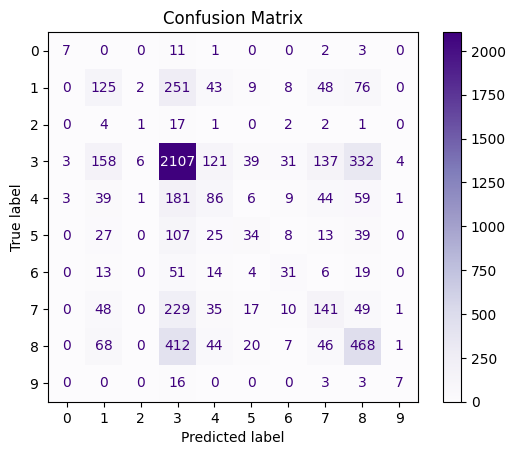

              precision    recall  f1-score   support

           0       0.54      0.29      0.38        24
           1       0.26      0.22      0.24       562
           2       0.10      0.04      0.05        28
           3       0.62      0.72      0.67      2938
           4       0.23      0.20      0.22       429
           5       0.26      0.13      0.18       253
           6       0.29      0.22      0.25       138
           7       0.32      0.27      0.29       530
           8       0.45      0.44      0.44      1066
           9       0.50      0.24      0.33        29

    accuracy                           0.50      5997
   macro avg       0.36      0.28      0.30      5997
weighted avg       0.48      0.50      0.49      5997



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Оценка модели
acc = model_cv.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))
loss, accuracy = model_cv.evaluate(X_valid, y_valid)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

# Предсказания
y_pred_probs = model_cv.predict(X_valid)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_valid, axis=1)

# Матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred))

In [ ]:
# Разделение данных
X_train_full, X_test, y_train_full, y_test = train_test_split(X_tfidf_scal, y, test_size=0.4, random_state=52)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.4, random_state=52)

In [ ]:
# Модель для TfidfVectorizer
model_tv = keras.models.Sequential()
model_tv.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
model_tv.add(Dense(256, activation='relu'))
model_tv.add(Dense(64, activation='relu'))
model_tv.add(Dense(y.shape[1], activation='softmax'))

model_tv.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

history_tv = model_tv.fit(X_train, y_train, epochs = 10, batch_size = 7, validation_data=(X_valid,y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.4600 - loss: 1.6337 - val_accuracy: 0.4912 - val_loss: 1.5173
Epoch 2/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5053 - loss: 1.3927 - val_accuracy: 0.4957 - val_loss: 1.4999
Epoch 3/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6059 - loss: 1.0942 - val_accuracy: 0.5058 - val_loss: 1.5730
Epoch 4/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7643 - loss: 0.6749 - val_accuracy: 0.5044 - val_loss: 1.8823
Epoch 5/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8782 - loss: 0.3952 - val_accuracy: 0.4867 - val_loss: 2.0354
Epoch 6/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9110 - loss: 0.2998 - val_accuracy: 0.4939 - val_loss: 2.5969
Epoch 7/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9283 - loss: 0.2222 - val_accuracy: 0.5198 - val_loss: 2.8090
Epoch 8/10
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9372 - loss:

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4876 - loss: 3.3770
0.49
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4787 - loss: 3.5773
Validation Loss: 3.5201, Validation Accuracy: 0.4819
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


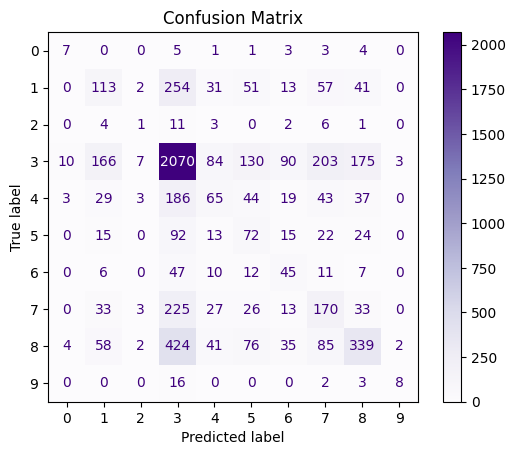

              precision    recall  f1-score   support

           0       0.29      0.29      0.29        24
           1       0.27      0.20      0.23       562
           2       0.06      0.04      0.04        28
           3       0.62      0.70      0.66      2938
           4       0.24      0.15      0.18       429
           5       0.17      0.28      0.22       253
           6       0.19      0.33      0.24       138
           7       0.28      0.32      0.30       530
           8       0.51      0.32      0.39      1066
           9       0.62      0.28      0.38        29

    accuracy                           0.48      5997
   macro avg       0.32      0.29      0.29      5997
weighted avg       0.48      0.48      0.47      5997



In [ ]:
# Оценка модели
acc = model_tv.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))
loss, accuracy = model_tv.evaluate(X_valid, y_valid)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

# Предсказания
y_pred_probs = model_tv.predict(X_valid)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_valid, axis=1)

# Матрица путаницы
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred))

In [ ]:
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Токенизация
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text['normal_text'])
X_sequences = tokenizer.texts_to_sequences(text['normal_text'])
X_padded = pad_sequences(X_sequences)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

42885

In [ ]:
print(text['normal_text'][0])
print(X_sequences[0])

ordinarily that discretion will be exercised so that cost follow the event and are awarded on a party and party basis a departure from normal practice to award indemnity cost requires some special or unusual feature in the case alpine hardwood aust pty ltd v hardy pty ltd no 2 2002 fca 224 2002 190 alr 121 at 11 weinberg j citing colgate palmolive co v cussons pty ltd 1993 46 fcr 225 at 233 sheppard j
[992, 6, 258, 74, 11, 661, 84, 6, 117, 831, 1, 312, 7, 35, 1555, 20, 4, 55, 7, 55, 178, 4, 2102, 39, 2283, 280, 3, 674, 1072, 117, 610, 145, 555, 14, 2961, 1126, 5, 1, 29, 12193, 14902, 1191, 34, 23, 16, 9635, 34, 23, 33, 61, 182, 51, 2045, 182, 1851, 154, 1770, 10, 323, 1446, 25, 1578, 3822, 3875, 198, 16, 4699, 34, 23, 449, 619, 77, 1492, 10, 2106, 2344, 25]


In [ ]:
maxlen = 250
X = pad_sequences(X_sequences, padding='post', maxlen=maxlen)

print(X[0, :])

[  992     6   258    74    11   661    84     6   117   831     1   312
     7    35  1555    20     4    55     7    55   178     4  2102    39
  2283   280     3   674  1072   117   610   145   555    14  2961  1126
     5     1    29 12193 14902  1191    34    23    16  9635    34    23
    33    61   182    51  2045   182  1851   154  1770    10   323  1446
    25  1578  3822  3875   198    16  4699    34    23   449   619    77
  1492    10  2106  2344    25     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0   

In [ ]:
from keras import layers

embedding_dim = 200

model_d = Sequential()
model_d.add(layers.Embedding(input_dim=vocab_size,
                           output_dim=embedding_dim,
                           input_length=maxlen))
model_d.add(layers.Flatten())
model_d.add(Dense(50, activation='relu'))
model_d.add(Dense(y.shape[1], activation='softmax'))

model_d.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

model_d.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.4, random_state=52)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.4, random_state=52)

In [ ]:
history_d = model_d.fit(X_train, y_train, epochs = 5, batch_size = 7, validation_data = (X_valid,y_valid))

Epoch 1/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 211s 163ms/step - accuracy: 0.4857 - loss: 1.6166 - val_accuracy: 0.5208 - val_loss: 1.4666
Epoch 2/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 215s 167ms/step - accuracy: 0.8816 - loss: 0.4954 - val_accuracy: 0.5086 - val_loss: 1.8288
Epoch 3/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 206s 160ms/step - accuracy: 0.9461 - loss: 0.1984 - val_accuracy: 0.5186 - val_loss: 1.8768
Epoch 4/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 268s 165ms/step - accuracy: 0.9521 - loss: 0.1252 - val_accuracy: 0.4686 - val_loss: 1.9992
Epoch 5/5
1285/1285 ━━━━━━━━━━━━━━━━━━━━ 253s 158ms/step - accuracy: 0.9497 - loss: 0.1375 - val_accuracy: 0.5174 - val_loss: 2.3036


In [ ]:
acc = model_d.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4874 - loss: 2.2572
0.48


In [ ]:
y_pred = model_d.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.29      0.14      0.19       970
           2       0.38      0.07      0.12        43
           3       0.57      0.79      0.66      4931
           4       0.25      0.11      0.15       687
           5       0.19      0.06      0.10       374
           6       0.55      0.15      0.24       236
           7       0.20      0.23      0.21       903
           8       0.42      0.26      0.32      1763
           9       0.33      0.03      0.05        38

    accuracy                           0.48      9994
   macro avg       0.32      0.18      0.20      9994
weighted avg       0.44      0.48      0.44      9994



In [ ]:
model_d.save('model_text.keras')

In [ ]:
import joblib
joblib.dump(model_d, 'model_text.joblib')
joblib.dump(tokenizer, 'tokenizer.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']